In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator, PercentFormatter,FixedFormatter)
%matplotlib inline


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

In [2]:
# source - https://ourworldindata.org/search?q=ocean+acidi
df = pd.read_csv("../Downloads/mean-seawater-ph.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Entity                   308 non-null    object 
 1   Code                     0 non-null      float64
 2   Day                      308 non-null    object 
 3   ocean_ph                 308 non-null    float64
 4   ocean_ph_yearly_average  297 non-null    float64
dtypes: float64(3), object(2)
memory usage: 12.2+ KB


In [4]:
df.shape

(308, 5)

In [5]:
type(df["Day"][0])

str

In [6]:
## format the "Day" column values Dtype from str to datetime
df['Day'] = pd.to_datetime(df['Day'], format="%Y-%m-%d")

In [7]:
## dropping rows(first 10) where table did not have the yearly average values
df = df[11:].reset_index(drop=True)

In [8]:
df

,Entity,Code,Day,ocean_ph,ocean_ph_yearly_average
0,Hawaii,NaN,1989-11-27,8.1101,8.1091
1,Hawaii,NaN,1990-01-05,8.1332,8.1101
2,Hawaii,NaN,1990-02-15,8.1229,8.1107
3,Hawaii,NaN,1990-03-19,8.1340,8.1107
4,Hawaii,NaN,1990-04-13,8.1229,8.1112
...,...,...,...,...,...
292,Hawaii,NaN,2019-07-02,8.0430,8.0587
293,Hawaii,NaN,2019-08-03,8.0391,8.0576
294,Hawaii,NaN,2019-09-05,8.0272,8.0563
295,Hawaii,NaN,2019-10-18,8.0494,8.0551


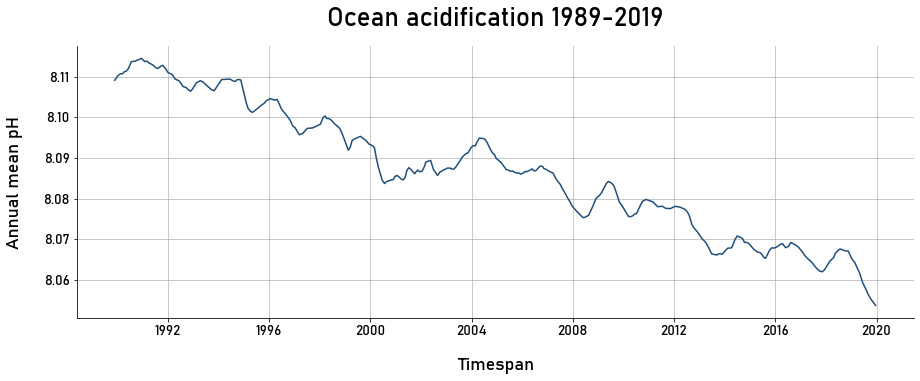

In [9]:
## visualize the evolution of the pH level of the ocean

font = {'family' : 'Bahnschrift',
        'weight' : 'bold',
        'size'   : 14}
plt.rc('font', **font)

fig, ax = plt.subplots()

ax.set_title('Ocean acidification 1989-2019', fontsize=26,pad=20)
ax.set_ylabel('Annual mean pH',fontsize=18,labelpad=20)
ax.set_xlabel('Timespan',fontsize=18,labelpad=20)
ax.grid(zorder=0)

ax.tick_params(axis='x',which="minor")
ax.tick_params(axis="both", grid_alpha=0.85)

ax.plot(df['Day'], df['ocean_ph_yearly_average'], color='#1f4e79', zorder=3)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


fig.set_size_inches(15, 5)

In [10]:
# set up the evaluation table:
# the name of the model, 
# the validation metrics: Mean Absolute Error, Root Mean Squared Error, Mean Percentage Error, R2-score/Determination Coefficient,
# and the year 2100 prediction if we are able to have one with the specific model
vdf = pd.DataFrame({"Model":[], "MAE":[], "RMSE":[],"MAPE":[],"R2-score":[], "Year 2100 prediction":[]})

# Numpy polinomial

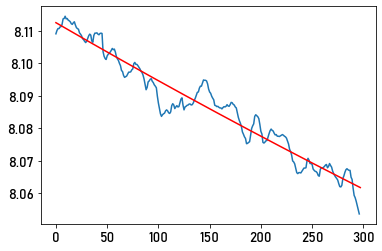

In [11]:
x = df.index
y = df["ocean_ph_yearly_average"]

coefs = np.polyfit(x, y, 2)
predict = np.poly1d(coefs)

x_test = np.linspace(0, 297, 297)
y_pred = predict(x_test[:, None])
plt.plot(x, y)
plt.plot(x_test, y_pred, c = 'r')

plt.show()

In [12]:
coefs

array([ 3.9512640e-08, -1.8248091e-04,  8.1125196e+00])

In [13]:
predict

poly1d([ 3.9512640e-08, -1.8248091e-04,  8.1125196e+00])

In [14]:
## year 2100 prediction
np_pred = predict(1110)

In [15]:
for i in range(1,5):
    coefs = np.polyfit(x, y, i)
    predict = np.poly1d(coefs)
    
    print(mean_absolute_error(y, predict(x)))

0.0029357880117949525
0.002923699294960799
0.002701374366821788
0.002698040822226749


In [16]:
for i in range(1,5):
    coefs = np.polyfit(x, y, i)
    predict = np.poly1d(coefs)
    
    print(np.sqrt(mean_squared_error(y, predict(x))))

0.0036056221541046194
0.0035962518162091506
0.0033722656167873085
0.003367139927638875


In [17]:
np_pred_mae = mean_absolute_error(y, predict(x))
np_pred_rmse = np.sqrt(mean_squared_error(y, predict(x)))
np_pred_mape = mean_absolute_percentage_error(y, predict(x))
np_r2 = r2_score(y, predict(x))

In [18]:
vdf.loc[0] = ['Np poly reg', np_pred_mae, np_pred_rmse, np_pred_mape, np_r2,np_pred]
vdf

,Model,MAE,RMSE,MAPE,R2-score,Year 2100 prediction
0,Np poly reg,0.002698,0.003367,0.000334,0.950143,7.958649


# # Sklearn linear regression model

In [19]:
model = LinearRegression()

X = np.array(df.index).reshape(-1,1)
y = df.ocean_ph_yearly_average

model.fit(X,y)

LinearRegression()

In [20]:
pred = model.predict(X)

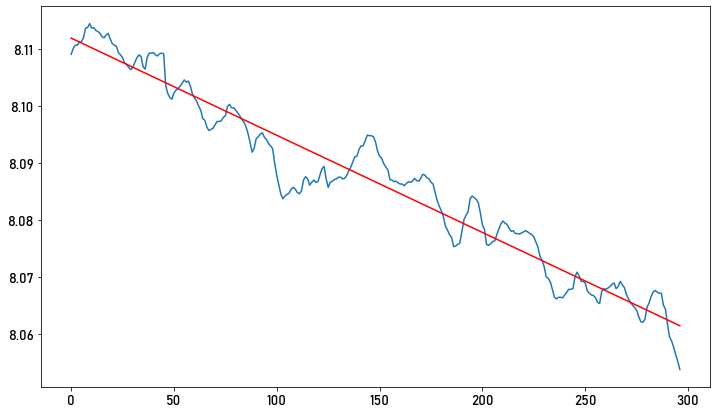

In [21]:
fig, ax = plt.subplots()

fig.set_size_inches(12,7)

ax.plot(df.index, df["ocean_ph_yearly_average"])
ax.plot(X, pred, color="r")

plt.show()

In [22]:
pred[-1]

8.061392145165298

In [23]:
## year 2100 prediction
lin_pred = float(model.predict([[1110]]))

In [24]:
pred_mae = mean_absolute_error(y, pred)
pred_rmse = np.sqrt(mean_squared_error(y, pred))
pred_mape = mean_absolute_percentage_error(y, pred)
pred_r2 = r2_score(y, pred)

In [25]:
vdf.loc[1] = ['Lin Reg', pred_mae, pred_rmse,pred_mape, pred_r2, lin_pred]
vdf

,Model,MAE,RMSE,MAPE,R2-score,Year 2100 prediction
0,Np poly reg,0.002698,0.003367,0.000334,0.950143,7.958649
1,Lin Reg,0.002936,0.003606,0.000363,0.942830,7.922373


# #Cross_val_predict

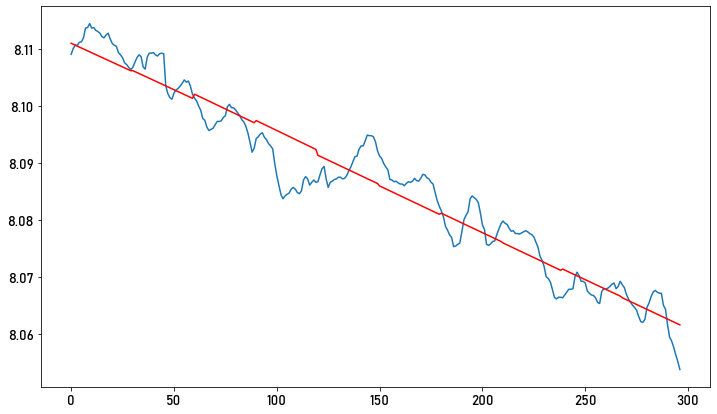

In [26]:
cross_pred = cross_val_predict(model, X, y, cv=10)

fig, ax = plt.subplots()

fig.set_size_inches(12,7)

ax.plot(df.index, df["ocean_ph_yearly_average"])
ax.plot(X, cross_pred, color="r")

plt.show()

In [27]:
cross_pred_mae = mean_absolute_error(y, cross_pred)
cross_pred_rmse = np.sqrt(mean_squared_error(y, cross_pred))
cross_pred_mape = mean_absolute_percentage_error(y, cross_pred)
cross_pred_r2 = r2_score(y, cross_pred)

## if we turn on the number of cv fold to the maximum(297, number of samples) MAE = 0.002954 RMSE= 0.003626
## and the red regression line would be staight as at the other predictions
vdf.loc[2] = ['Cross_val pred', cross_pred_mae, cross_pred_rmse, cross_pred_mape, cross_pred_r2,"-"]
vdf

,Model,MAE,RMSE,MAPE,R2-score,Year 2100 prediction
0,Np poly reg,0.002698,0.003367,0.000334,0.950143,7.958649
1,Lin Reg,0.002936,0.003606,0.000363,0.942830,7.922373
2,Cross_val pred,0.003177,0.003881,0.000393,0.933763,-


# #train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model.fit(X_train, y_train)

##x_test = np.array(np.linspace(0, 1110, num=60)).reshape(-1,1)

tt_pred = model.predict(X_test)

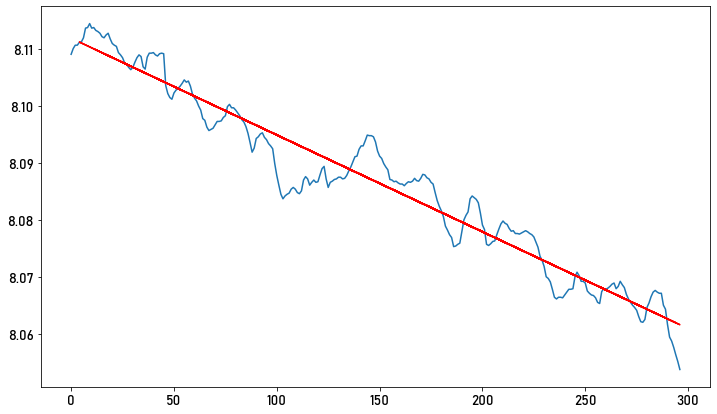

In [29]:
fig, ax = plt.subplots()

fig.set_size_inches(12,7)

ax.plot(df.index, df["ocean_ph_yearly_average"])
ax.plot(X_test, tt_pred, color="r")

plt.show()

In [30]:
## 
tt_pred[-1]

8.07365389838419

In [31]:
tt_pred_mae = mean_absolute_error(y_test, tt_pred)
tt_pred_rmse = np.sqrt(mean_squared_error(y_test, tt_pred))
tt_pred_mape = mean_absolute_percentage_error(y_test, tt_pred)
tt_pred_r2 = r2_score(y_test, tt_pred)

vdf.loc[3] = ['Train_test_split', tt_pred_mae, tt_pred_rmse, tt_pred_mape,tt_pred_r2, "-"]
vdf

,Model,MAE,RMSE,MAPE,R2-score,Year 2100 prediction
0,Np poly reg,0.002698,0.003367,0.000334,0.950143,7.958649
1,Lin Reg,0.002936,0.003606,0.000363,0.942830,7.922373
2,Cross_val pred,0.003177,0.003881,0.000393,0.933763,-
3,Train_test_split,0.003225,0.003911,0.000399,0.930296,-


# Sklearn polynomial model

In [32]:
poly = PolynomialFeatures(degree=2, include_bias=False)

poly_features = poly.fit_transform(X)

In [33]:
model.fit(poly_features, y)

LinearRegression()

In [34]:
poly_pred = model.predict(poly_features)

In [35]:
model.coef_

array([-1.8248091e-04,  3.9512640e-08])

In [36]:
model.intercept_

8.112519595791815

In [37]:
poly_predict = float(model.predict(poly.fit_transform([[1110]])))

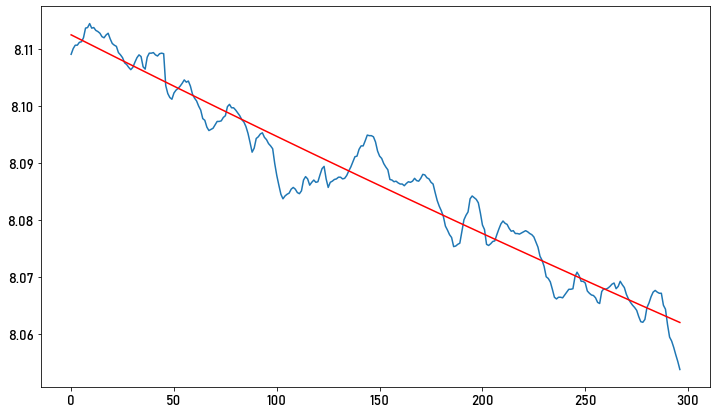

In [38]:
fig, ax = plt.subplots()

fig.set_size_inches(12,7)

ax.plot(df.index, df["ocean_ph_yearly_average"])
ax.plot(X, poly_pred, color="r")

plt.show()

In [39]:
poly_pred[-1]

8.061967185785713

In [40]:
poly_pred_mae = mean_absolute_error(y, poly_pred)
poly_pred_rmse = np.sqrt(mean_squared_error(y, poly_pred))
poly_pred_mape = mean_absolute_percentage_error(y, poly_pred)
poly_pred_r2 = r2_score(y, poly_pred)

vdf.loc[4] = ['Poly reg',poly_pred_mae,poly_pred_rmse, poly_pred_mape, poly_pred_r2, poly_predict]
vdf

,Model,MAE,RMSE,MAPE,R2-score,Year 2100 prediction
0,Np poly reg,0.002698,0.003367,0.000334,0.950143,7.958649
1,Lin Reg,0.002936,0.003606,0.000363,0.942830,7.922373
2,Cross_val pred,0.003177,0.003881,0.000393,0.933763,-
3,Train_test_split,0.003225,0.003911,0.000399,0.930296,-
4,Poly reg,0.002924,0.003596,0.000362,0.943127,7.958649


In [41]:
## sorting the evaluation table by RMSE
vdf = vdf.sort_values(by="RMSE").reset_index(drop=True)

In [42]:
vdf

,Model,MAE,RMSE,MAPE,R2-score,Year 2100 prediction
0,Np poly reg,0.002698,0.003367,0.000334,0.950143,7.958649
1,Poly reg,0.002924,0.003596,0.000362,0.943127,7.958649
2,Lin Reg,0.002936,0.003606,0.000363,0.942830,7.922373
3,Cross_val pred,0.003177,0.003881,0.000393,0.933763,-
4,Train_test_split,0.003225,0.003911,0.000399,0.930296,-


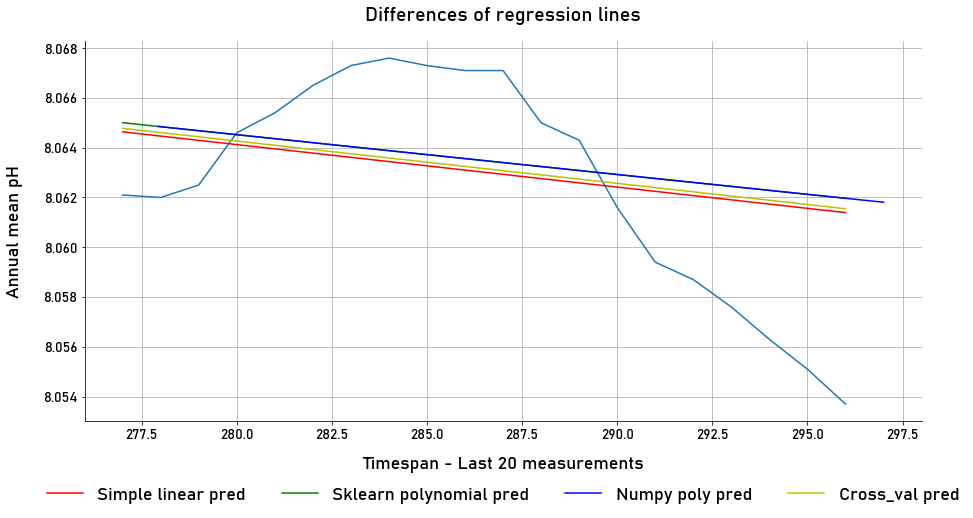

In [44]:
## to have a look at the small differences between the particular regression lines

fig, ax = plt.subplots()

fig.set_size_inches(15,7)

ax.set_title("Differences of regression lines", pad=20, fontsize=20)
ax.set_ylabel('Annual mean pH',fontsize=18,labelpad=20)
ax.set_xlabel('Timespan - Last 20 measurements',fontsize=18,labelpad=15)

ax.plot(df.index[-20:], df["ocean_ph_yearly_average"][-20:])
ax.plot(X[-20:], pred[-20:], color="r", label="Simple linear pred")
ax.plot(X[-20:], poly_pred[-20:], color="g", label="Sklearn polynomial pred")
ax.plot(x_test[-20:], y_pred[-20:], c='b',label="Numpy poly pred")
ax.plot(X[-20:], cross_pred[-20:], color="y",label="Cross_val pred")
ax.legend(ncol=4, loc='upper center', bbox_to_anchor=(0.5, -0.13),frameon=False, fontsize=18)
ax.grid()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)


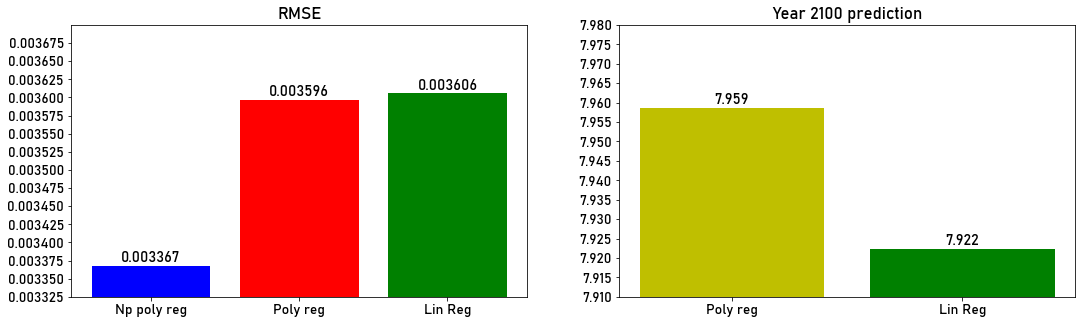

In [45]:
fig, ax = plt.subplots(1,2)

fig.set_size_inches(18,5)

## barplot for comparing RMSE values
color=["b","r","g"]
ax[0].set_title("RMSE")
ax[0].bar(vdf["Model"][0:3], vdf.RMSE[0:3],color=color)
ax[0].set_yticks(np.arange(0.0032,0.0037,step=0.000025))
ax[0].set_ylim(0.003325,0.0037)

for bar in ax[0].patches:
    ax[0].annotate(format(bar.get_height(), '.6f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

## barplot for comparing year 2100 prediciton(poly_reg and np_poly_reg had the same result)
c=["y","g"]
ax[1].set_title("Year 2100 prediction")
ax[1].bar(vdf["Model"][1:3], vdf["Year 2100 prediction"][1:3],color=c)
ax[1].set_yticks(np.arange(7.91,7.98,step=0.005))
ax[1].set_ylim(7.91,7.98)

for bar in ax[1].patches:
    ax[1].annotate(format(bar.get_height(), '.3f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center',va='center',
                    size=15, xytext=(0, 8),
                    textcoords='offset points')

plt.show()